<a href="https://colab.research.google.com/github/comojin1994/Machine_Learning/blob/master/Regression/KBO_Batter_OPS_Estimate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 경로확인 

In [0]:
os.getcwd()

'/Users/sungjinkim/Documents/Study/Regression_Project'

### 데이터 불러오기 

In [0]:
batter = pd.read_csv('./Data/Regular_Season_Batter.csv')
batter_dbd = pd.read_csv('./Data/Regular_Season_Batter_Day_by_Day_b4.csv')

In [0]:
batter.head()

batter_id batter_name  year team    avg    G   AB   R   H  2B  ...  GDP  \
0          0        가르시아  2018   LG  0.339   50  183  27  62   9  ...    3   
1          1         강경학  2011   한화  0.000    2    1   0   0   0  ...    0   
2          1         강경학  2014   한화  0.221   41   86  11  19   2  ...    1   
3          1         강경학  2015   한화  0.257  120  311  50  80   7  ...    3   
4          1         강경학  2016   한화  0.158   46  101  16  16   3  ...    5   

     SLG    OBP   E  height/weight      year_born   position  \
0  0.519  0.383   9     177cm/93kg  1985년 04월 12일  내야수(우투우타)   
1  0.000  0.000   1     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   
2  0.349  0.337   6     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   
3  0.325  0.348  15     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   
4  0.257  0.232   7     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   

                                   career  starting_salary    OPS  
0  쿠바 Ciego de Avila Maximo Gomez Baez(대)              NaN  0.902  
1                       광주대성초-광주동성중-광주동성고          10000만원  0.000  
2                       광주대성초-광주동성중-광주동성고          10000만원  0.686  
3                       광주대성초-광주동성중-광주동성고          10000만원  0.673  
4                       광주대성초-광주동성중-광주동성고          10000만원  0.489  

[5 rows x 29 columns]

# EDA 

### 변수확인 

In [0]:
batter.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS'],
      dtype='object')

## batter에 나이변수 추가

In [0]:
batter['Age'] = batter['year'] - batter['year_born'].apply(lambda x: int(x[:4]))

In [0]:
batter['Age'].describe()

count    2454.000000
mean       27.103504
std         4.687360
min        18.000000
25%        24.000000
50%        27.000000
75%        30.000000
max        42.000000
Name: Age, dtype: float64

In [0]:
batter.describe()

batter_id         year          avg            G           AB  \
count  2454.000000  2454.000000  2428.000000  2454.000000  2454.000000   
mean    178.079462  2011.614507     0.237559    72.535045   201.514670   
std      97.557947     4.992833     0.098440    45.093871   169.537029   
min       0.000000  1993.000000     0.000000     1.000000     0.000000   
25%     101.250000  2008.000000     0.203000    28.000000    38.250000   
50%     183.000000  2013.000000     0.255000    79.000000   163.000000   
75%     265.000000  2016.000000     0.291000   115.000000   357.500000   
max     344.000000  2018.000000     1.000000   144.000000   600.000000   

                 R            H           2B           3B           HR  ...  \
count  2454.000000  2454.000000  2454.000000  2454.000000  2454.000000  ...   
mean     29.912388    55.988183     9.863488     0.957620     5.504075  ...   
std      28.778759    52.253844     9.871314     1.647193     7.989380  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       5.000000     8.000000     1.000000     0.000000     0.000000  ...   
50%      21.000000    40.000000     7.000000     0.000000     2.000000  ...   
75%      49.000000   100.000000    16.000000     1.000000     8.000000  ...   
max     135.000000   201.000000    47.000000    17.000000    53.000000  ...   

                CS           BB          HBP           SO          GDP  \
count  2454.000000  2454.000000  2454.000000  2454.000000  2454.000000   
mean      2.335778    20.943765     3.424613    38.596985     4.603504   
std       3.194045    21.206113     4.132614    31.801466     4.713531   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     3.000000     0.000000    10.000000     1.000000   
50%       1.000000    14.000000     2.000000    33.000000     3.000000   
75%       3.000000    34.000000     5.000000    60.000000     7.000000   
max      21.000000   108.000000    27.000000   161.000000    24.000000   

               SLG          OBP            E          OPS          Age  
count  2428.000000  2430.000000  2454.000000  2428.000000  2454.000000  
mean      0.343826     0.306684     3.676447     0.649939    27.103504  
std       0.163335     0.111778     4.585248     0.261634     4.687360  
min       0.000000     0.000000     0.000000     0.000000    18.000000  
25%       0.267454     0.272727     0.000000     0.546000    24.000000  
50%       0.360124     0.328592     2.000000     0.688637    27.000000  
75%       0.436000     0.367000     5.000000     0.797234    30.000000  
max       3.000000     1.000000    30.000000     4.000000    42.000000  

[8 rows x 23 columns]

## height/weigth 각자 다른 column으로 분류후 결측치 평균으로 채우기  

In [0]:
len(batter[batter['height/weight'].isna() == True])

802

In [0]:
batter['height/weight'] = batter['height/weight'].fillna('0cm/0kg')

In [0]:
batter['height'] = batter['height/weight'].apply(lambda x: int(x.split('/')[0][:-2]))
batter['weight'] = batter['height/weight'].apply(lambda x: int(x.split('/')[1][:-2]))

### 결측값을 제외한 타자 키,몸무게의 평균 값  

In [0]:
mean_h = np.mean(batter['height'][batter['height'] != 0])
mean_w = np.mean(batter['weight'][batter['weight'] != 0])
mean_h, mean_w

(181.46912832929783, 86.84806295399515)

In [0]:
batter['height'] = batter['height'].apply(lambda x: mean_h if x == 0 else x)
batter['weight'] = batter['weight'].apply(lambda x: mean_w if x == 0 else x)

In [0]:
batter[['height', 'weight']].describe()

height       weight
count  2454.000000  2454.000000
mean    181.469128    86.848063
std       3.774603     9.241932
min     165.000000    64.000000
25%     180.000000    81.000000
50%     181.469128    86.848063
75%     183.000000    90.000000
max     194.000000   130.000000

### 이상치 확인 

In [0]:
batter.describe()

batter_id         year          avg            G           AB  \
count  2454.000000  2454.000000  2428.000000  2454.000000  2454.000000   
mean    178.079462  2011.614507     0.237559    72.535045   201.514670   
std      97.557947     4.992833     0.098440    45.093871   169.537029   
min       0.000000  1993.000000     0.000000     1.000000     0.000000   
25%     101.250000  2008.000000     0.203000    28.000000    38.250000   
50%     183.000000  2013.000000     0.255000    79.000000   163.000000   
75%     265.000000  2016.000000     0.291000   115.000000   357.500000   
max     344.000000  2018.000000     1.000000   144.000000   600.000000   

                 R            H           2B           3B           HR  ...  \
count  2454.000000  2454.000000  2454.000000  2454.000000  2454.000000  ...   
mean     29.912388    55.988183     9.863488     0.957620     5.504075  ...   
std      28.778759    52.253844     9.871314     1.647193     7.989380  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       5.000000     8.000000     1.000000     0.000000     0.000000  ...   
50%      21.000000    40.000000     7.000000     0.000000     2.000000  ...   
75%      49.000000   100.000000    16.000000     1.000000     8.000000  ...   
max     135.000000   201.000000    47.000000    17.000000    53.000000  ...   

               HBP           SO          GDP          SLG          OBP  \
count  2454.000000  2454.000000  2454.000000  2428.000000  2430.000000   
mean      3.424613    38.596985     4.603504     0.343826     0.306684   
std       4.132614    31.801466     4.713531     0.163335     0.111778   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000    10.000000     1.000000     0.267454     0.272727   
50%       2.000000    33.000000     3.000000     0.360124     0.328592   
75%       5.000000    60.000000     7.000000     0.436000     0.367000   
max      27.000000   161.000000    24.000000     3.000000     1.000000   

                 E          OPS          Age       height       weight  
count  2454.000000  2428.000000  2454.000000  2454.000000  2454.000000  
mean      3.676447     0.649939    27.103504   181.469128    86.848063  
std       4.585248     0.261634     4.687360     3.774603     9.241932  
min       0.000000     0.000000    18.000000   165.000000    64.000000  
25%       0.000000     0.546000    24.000000   180.000000    81.000000  
50%       2.000000     0.688637    27.000000   181.469128    86.848063  
75%       5.000000     0.797234    30.000000   183.000000    90.000000  
max      30.000000     4.000000    42.000000   194.000000   130.000000  

[8 rows x 25 columns]

In [0]:
batter.head()

batter_id batter_name  year team    avg    G   AB   R   H  2B  ...   E  \
0          0        가르시아  2018   LG  0.339   50  183  27  62   9  ...   9   
1          1         강경학  2011   한화  0.000    2    1   0   0   0  ...   1   
2          1         강경학  2014   한화  0.221   41   86  11  19   2  ...   6   
3          1         강경학  2015   한화  0.257  120  311  50  80   7  ...  15   
4          1         강경학  2016   한화  0.158   46  101  16  16   3  ...   7   

   height/weight      year_born   position  \
0     177cm/93kg  1985년 04월 12일  내야수(우투우타)   
1     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   
2     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   
3     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   
4     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   

                                   career  starting_salary    OPS  Age  \
0  쿠바 Ciego de Avila Maximo Gomez Baez(대)              NaN  0.902   33   
1                       광주대성초-광주동성중-광주동성고          10000만원  0.000   19   
2                       광주대성초-광주동성중-광주동성고          10000만원  0.686   22   
3                       광주대성초-광주동성중-광주동성고          10000만원  0.673   23   
4                       광주대성초-광주동성중-광주동성고          10000만원  0.489   24   

   height  weight  
0   177.0    93.0  
1   180.0    72.0  
2   180.0    72.0  
3   180.0    72.0  
4   180.0    72.0  

[5 rows x 32 columns]

In [0]:
batter[batter['avg'] == min(batter['avg'])]

batter_id batter_name  year team  avg   G  AB  R  H  2B  ...  E  \
1             1         강경학  2011   한화  0.0   2   1  0  0   0  ...  1   
7             2         강구성  2013   NC  0.0   2   2  0  0   0  ...  0   
9             2         강구성  2016   NC  0.0   2   3  0  0   0  ...  0   
10            2         강구성  2017   NC  0.0   1   1  0  0   0  ...  0   
14          138         백승룡  2007   한화  0.0   8   4  3  0   0  ...  0   
...         ...         ...   ...  ...  ...  ..  .. .. ..  ..  ... ..   
2424        340         황선일  2006   LG  0.0   1   2  0  0   0  ...  0   
2430        341         황윤호  2015   NC  0.0  10   5  2  0   0  ...  0   
2449        344         황진수  2014   롯데  0.0   5   5  0  0   0  ...  0   
2450        344         황진수  2015   롯데  0.0   2   2  0  0   0  ...  0   
2451        344         황진수  2016   롯데  0.0  11  10  2  0   0  ...  0   

      height/weight      year_born   position                          career  \
1        180cm/72kg  1992년 08월 11일  내야수(우투좌타)               광주대성초-광주동성중-광주동성고   
7        180cm/82kg  1993년 06월 09일  외야수(우투좌타)               관산초-부천중-야탑고-NC-상무   
9        180cm/82kg  1993년 06월 09일  외야수(우투좌타)               관산초-부천중-야탑고-NC-상무   
10       180cm/82kg  1993년 06월 09일  외야수(우투좌타)               관산초-부천중-야탑고-NC-상무   
14          0cm/0kg  1982년 08월 16일        NaN  사직초(부산극동리틀)-사직중-경남상고-경성대-한화-넥센   
...             ...            ...        ...                             ...   
2424        0cm/0kg  1987년 02월 17일        NaN         군산중앙초-군산중-군산상고-LG-상무-LG   
2430     177cm/78kg  1993년 09월 22일  내야수(우투우타)            수주초-신월중-장충고-NC-경찰-NC   
2449     181cm/82kg  1989년 02월 15일  내야수(우투양타)                     석천초-대헌중-공주고   
2450     181cm/82kg  1989년 02월 15일  내야수(우투양타)                     석천초-대헌중-공주고   
2451     181cm/82kg  1989년 02월 15일  내야수(우투양타)                     석천초-대헌중-공주고   

      starting_salary    OPS  Age      height     weight  
1             10000만원  0.000   19  180.000000  72.000000  
7              9000만원  0.000   20  180.000000  82.000000  
9              9000만원  0.000   23  180.000000  82.000000  
10             9000만원  0.000   24  180.000000  82.000000  
14                NaN  0.000   25  181.469128  86.848063  
...               ...    ...  ...         ...        ...  
2424              NaN  0.000   19  181.469128  86.848063  
2430           3000만원  0.167   22  177.000000  78.000000  
2449           4000만원  0.000   25  181.000000  82.000000  
2450           4000만원  0.000   26  181.000000  82.000000  
2451           4000만원  0.000   27  181.000000  82.000000  

[165 rows x 32 columns]

In [0]:
batter.iloc[1]

batter_id                          1
batter_name                      강경학
year                            2011
team                              한화
avg                                0
G                                  2
AB                                 1
R                                  0
H                                  0
2B                                 0
3B                                 0
HR                                 0
TB                                 0
RBI                                0
SB                                 0
CS                                 0
BB                                 0
HBP                                0
SO                                 1
GDP                                0
SLG                                0
OBP                                0
E                                  1
height/weight             180cm/72kg
year_born              1992년 08월 11일
position                   내야수(우투좌타)
career             광주대성초-광주동성중-광주동성고
s

In [0]:
batter[batter['avg'] == max(batter['avg'])]

batter_id batter_name  year team  avg  G  AB  R  H  2B  ...  E  \
192          22         권정웅  2016   삼성  1.0  3   1  1  1   0  ...  0   
384          45         김성현  2006   SK  1.0  5   1  2  1   0  ...  0   
656          96         류지혁  2012   두산  1.0  2   1  0  1   0  ...  0   
1277        185         용덕한  2004   두산  1.0  5   2  1  2   0  ...  0   
1371        196         윤완주  2014  KIA  1.0  5   2  0  2   0  ...  0   
2083        288         조윤준  2016   LG  1.0  2   1  1  1   0  ...  0   
2124        294         지석훈  2004   현대  1.0  5   1  1  1   0  ...  0   

      height/weight      year_born   position  \
192      180cm/88kg  1992년 11월 15일   포수(우투우타)   
384      172cm/72kg  1987년 03월 09일  내야수(우투우타)   
656      181cm/75kg  1994년 01월 13일  내야수(우투좌타)   
1277        0cm/0kg  1981년 04월 09일        NaN   
1371        0cm/0kg  1989년 02월 25일        NaN   
2083     185cm/95kg  1989년 08월 30일   포수(우투우타)   
2124     181cm/74kg  1984년 03월 17일  내야수(우투우타)   

                                    career  starting_salary  OPS  Age  \
192                      서울이수초-영동중-덕수고-한양대           6000만원  2.0   24   
384                   송정동초-충장중-광주제일고-SK-상무           7000만원  2.0   19   
656                      청원초-선린중-충암고-두산-상무           7000만원  2.0   18   
1277  대구중앙초-대구중-대구상고-동아대-두산-상무-두산-롯데-KT-NC              NaN  2.0   23   
1371                       대연초-부산중-개성고-경성대              NaN  2.0   25   
2083                     대전신흥초-한밭중-북일고-중앙대          20000만원  2.0   27   
2124               가동초-휘문중-휘문고-현대-우리-상무-넥센          25000만원  4.0   20   

          height     weight  
192   180.000000  88.000000  
384   172.000000  72.000000  
656   181.000000  75.000000  
1277  181.469128  86.848063  
1371  181.469128  86.848063  
2083  185.000000  95.000000  
2124  181.000000  74.000000  

[7 rows x 32 columns]

In [0]:
batter.iloc[1277]

batter_id                                           185
batter_name                                         용덕한
year                                               2004
team                                                 두산
avg                                                   1
G                                                     5
AB                                                    2
R                                                     1
H                                                     2
2B                                                    0
3B                                                    0
HR                                                    0
TB                                                    2
RBI                                                   1
SB                                                    0
CS                                                    0
BB                                                    0
HBP                                             

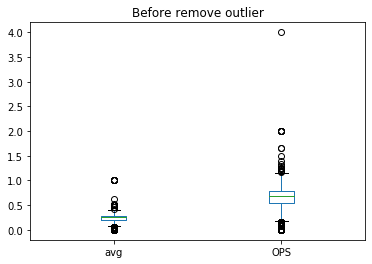

In [0]:
batter[['avg', 'OPS']].plot.box()
plt.title('Before remove outlier')
plt.show()

### 규정타석을 채운 타자 데이터만 추출 

In [0]:
batter = batter[batter['AB'] >= 396]

In [0]:
batter.describe()

batter_id         year         avg           G          AB  \
count  476.000000   476.000000  476.000000  476.000000  476.000000   
mean   169.283613  2011.741597    0.301179  126.899160  457.850840   
std     95.308858     5.448557    0.029112    8.646649   43.434655   
min      4.000000  1993.000000    0.219000  100.000000  396.000000   
25%     92.500000  2008.000000    0.280000  121.750000  422.000000   
50%    155.500000  2013.000000    0.301000  126.000000  448.500000   
75%    238.500000  2016.000000    0.320250  133.000000  485.000000   
max    342.000000  2018.000000    0.393000  144.000000  600.000000   

                R           H          2B          3B          HR  ...  \
count  476.000000  476.000000  476.000000  476.000000  476.000000  ...   
mean    75.210084  138.239496   24.689076    2.336134   16.010504  ...   
std     18.055994   21.234565    6.863478    2.473531   10.111270  ...   
min     29.000000   88.000000    5.000000    0.000000    0.000000  ...   
25%     62.000000  123.000000   20.000000    1.000000    8.000000  ...   
50%     73.000000  135.500000   24.000000    2.000000   15.000000  ...   
75%     86.250000  153.000000   29.000000    3.000000   22.000000  ...   
max    135.000000  201.000000   47.000000   17.000000   53.000000  ...   

              HBP          SO         GDP         SLG         OBP           E  \
count  476.000000  476.000000  476.000000  476.000000  476.000000  476.000000   
mean     7.554622   78.516807   10.218487    0.468865    0.376200    7.363445   
std      4.730101   24.456831    4.355584    0.082661    0.038838    5.850079   
min      0.000000   29.000000    1.000000    0.000000    0.000000    0.000000   
25%      4.000000   60.000000    7.000000    0.414724    0.354000    3.000000   
50%      7.000000   76.500000   10.000000    0.462683    0.373947    6.000000   
75%     10.000000   93.000000   13.000000    0.524000    0.399000   12.000000   
max     27.000000  161.000000   24.000000    0.790254    0.503401   30.000000   

              OPS         Age      height      weight  
count  476.000000  476.000000  476.000000  476.000000  
mean     0.845065   28.094538  181.796165   89.214517  
std      0.112717    4.043122    4.498618   11.660903  
min      0.000000   19.000000  165.000000   66.000000  
25%      0.771468   25.000000  180.000000   83.000000  
50%      0.832932   28.000000  181.469128   86.848063  
75%      0.913250   31.000000  185.000000   96.000000  
max      1.293656   39.000000  194.000000  130.000000  

[8 rows x 25 columns]

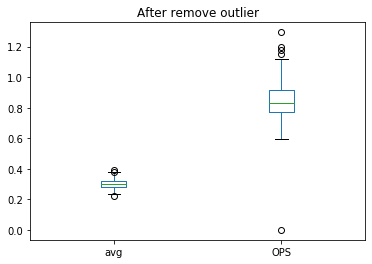

In [0]:
batter[['avg', 'OPS']].plot.box()
plt.title('After remove outlier')
plt.show()

In [0]:
batter[batter['OPS'] == 0]

batter_id batter_name  year team   avg    G   AB   R    H  2B  ...   E  \
1935        270         정성훈  2000   해태  0.26  119  457  50  119  21  ...  16   

      height/weight      year_born   position                          career  \
1935     182cm/83kg  1980년 06월 27일  내야수(우투우타)  송정동초-무등중-광주제일고-해태-KIA-현대-우리-LG   

      starting_salary  OPS  Age  height  weight  
1935          15000만원  0.0   20   182.0    83.0  

[1 rows x 32 columns]

In [0]:
batter = batter.drop(1935, axis = 0)

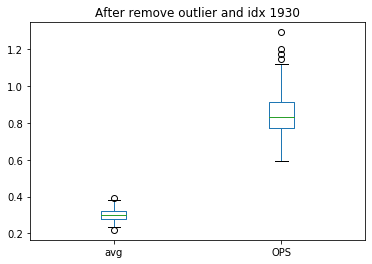

In [0]:
batter[['avg', 'OPS']].plot.box()
plt.title('After remove outlier and idx 1930')
plt.show()

### 연속형 변수만을 채택

In [0]:
batter_conti = batter.drop(['batter_id', 'year', 'year_born', 'batter_name',
                            'team', 'position', 'career', 'starting_salary', 'height/weight'], axis=1)

In [0]:
batter_conti.columns

Index(['avg', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS',
       'BB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP', 'E', 'OPS', 'Age', 'height',
       'weight'],
      dtype='object')

## 상관관계가 높은 Top 10 상관행렬 구하기 및 시각화

In [0]:
batter_conti.corr()

avg         G        AB         R         H        2B        3B  \
avg     1.000000  0.031521  0.276329  0.518462  0.794109  0.460100  0.118309   
G       0.031521  1.000000  0.705510  0.340725  0.468465  0.305828  0.054327   
AB      0.276329  0.705510  1.000000  0.654726  0.801326  0.444388  0.229076   
R       0.518462  0.340725  0.654726  1.000000  0.733380  0.463250  0.322882   
H       0.794109  0.468465  0.801326  0.733380  1.000000  0.568042  0.219272   
2B      0.460100  0.305828  0.444388  0.463250  0.568042  1.000000  0.019998   
3B      0.118309  0.054327  0.229076  0.322882  0.219272  0.019998  1.000000   
HR      0.249366  0.217239  0.210047  0.385228  0.288836  0.354712 -0.319513   
TB      0.618001  0.414695  0.604895  0.702712  0.767419  0.653363  0.001461   
RBI     0.435156  0.343147  0.362923  0.422076  0.502384  0.501739 -0.212340   
SB     -0.031301 -0.008798  0.233707  0.325382  0.123649 -0.115683  0.490966   
CS     -0.063536 -0.001428  0.228077  0.207909  0.098994 -0.123306  0.449228   
BB      0.261707  0.273156  0.269493  0.456173  0.332245  0.191351 -0.069519   
HBP    -0.001535  0.081716 -0.022150  0.109246 -0.014532  0.019950 -0.125135   
SO     -0.213233  0.329644  0.259986  0.213682  0.033858  0.174135 -0.030206   
GDP     0.025282  0.172424  0.026141 -0.169660  0.029977  0.090816 -0.370309   
SLG     0.616828  0.105430  0.187500  0.505244  0.501672  0.553149 -0.127133   
OBP     0.820398  0.050588  0.168839  0.533522  0.614663  0.361405 -0.010195   
E      -0.186276  0.098402 -0.089952 -0.090344 -0.172101 -0.010529 -0.032360   
OPS     0.734834  0.096138  0.196898  0.556391  0.580368  0.535947 -0.099228   
Age     0.127478  0.039978  0.024738 -0.004526  0.097730  0.038797 -0.278387   
height  0.066903  0.009532  0.039237  0.000930  0.062641  0.092490 -0.165760   
weight  0.125241  0.059427  0.043697 -0.024006  0.108453  0.162361 -0.364459   

              HR        TB       RBI  ...       HBP        SO       GDP  \
avg     0.249366  0.618001  0.435156  ... -0.001535 -0.213233  0.025282   
G       0.217239  0.414695  0.343147  ...  0.081716  0.329644  0.172424   
AB      0.210047  0.604895  0.362923  ... -0.022150  0.259986  0.026141   
R       0.385228  0.702712  0.422076  ...  0.109246  0.213682 -0.169660   
H       0.288836  0.767419  0.502384  ... -0.014532  0.033858  0.029977   
2B      0.354712  0.653363  0.501739  ...  0.019950  0.174135  0.090816   
3B     -0.319513  0.001461 -0.212340  ... -0.125135 -0.030206 -0.370309   
HR      1.000000  0.818046  0.844061  ...  0.295797  0.443286  0.217009   
TB      0.818046  1.000000  0.847707  ...  0.179257  0.333395  0.131669   
RBI     0.844061  0.847707  1.000000  ...  0.204414  0.360521  0.286738   
SB     -0.348603 -0.138189 -0.367638  ... -0.107562 -0.114734 -0.404375   
CS     -0.345786 -0.153490 -0.365380  ... -0.154405 -0.105276 -0.374134   
BB      0.355857  0.412650  0.410491  ...  0.077283  0.118396  0.045346   
HBP     0.295797  0.179257  0.204414  ...  1.000000  0.158769  0.091356   
SO      0.443286  0.333395  0.360521  ...  0.158769  1.000000 -0.030376   
GDP     0.217009  0.131669  0.286738  ...  0.091356 -0.030376  1.000000   
SLG     0.885747  0.892090  0.834976  ...  0.239195  0.261233  0.150101   
OBP     0.384317  0.595247  0.497365  ...  0.210279 -0.116018  0.055601   
E      -0.001320 -0.086178 -0.074367  ...  0.116364  0.029262  0.032155   
OPS     0.794307  0.868420  0.793175  ...  0.249505  0.158876  0.131474   
Age     0.136060  0.111582  0.169437  ... -0.081656  0.023927  0.241821   
height  0.353470  0.260074  0.316806  ...  0.009238  0.285518  0.122323   
weight  0.516412  0.378672  0.500440  ...  0.174817  0.239300  0.345200   

             SLG       OBP         E       OPS       Age    height    weight  
avg     0.616828  0.820398 -0.186276  0.734834  0.127478  0.066903  0.125241  
G       0.105430  0.050588  0.098402  0.096138  0.039978  0.009532  0.059427  
AB      0.187500  0.168839 -0.089952  0.196898  0.0247

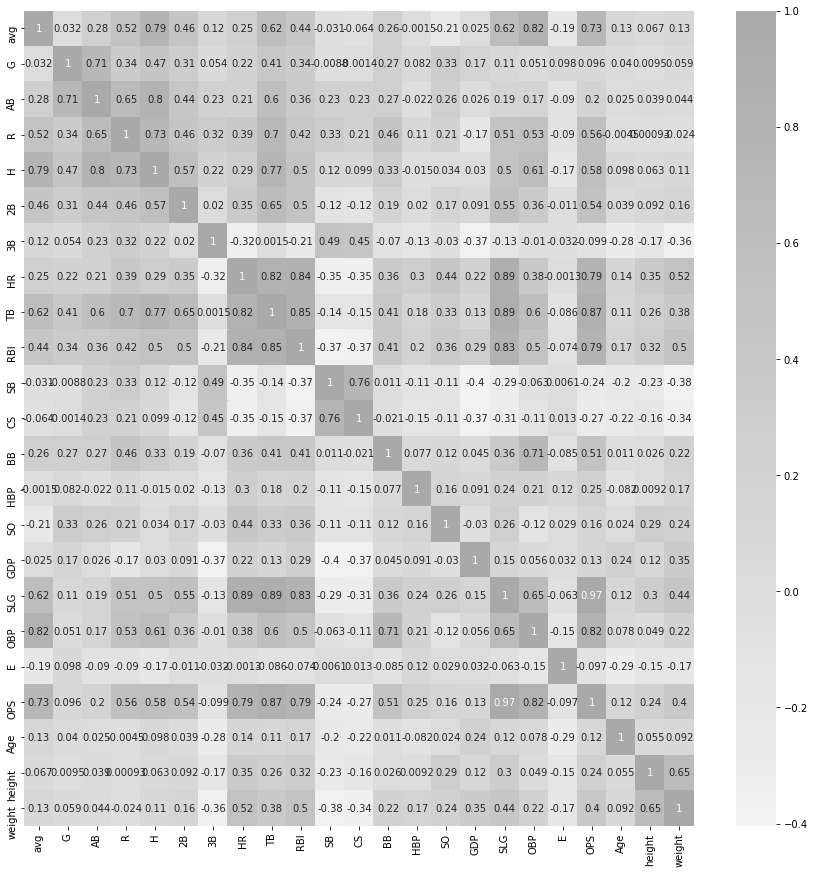

In [0]:
plt.figure(figsize=(15, 15))
cmap = sns.light_palette('darkgray', as_cmap=True)
sns.heatmap(batter_conti.corr(), annot=True, cmap=cmap)
plt.show()

## 변수별 산점도 시각화

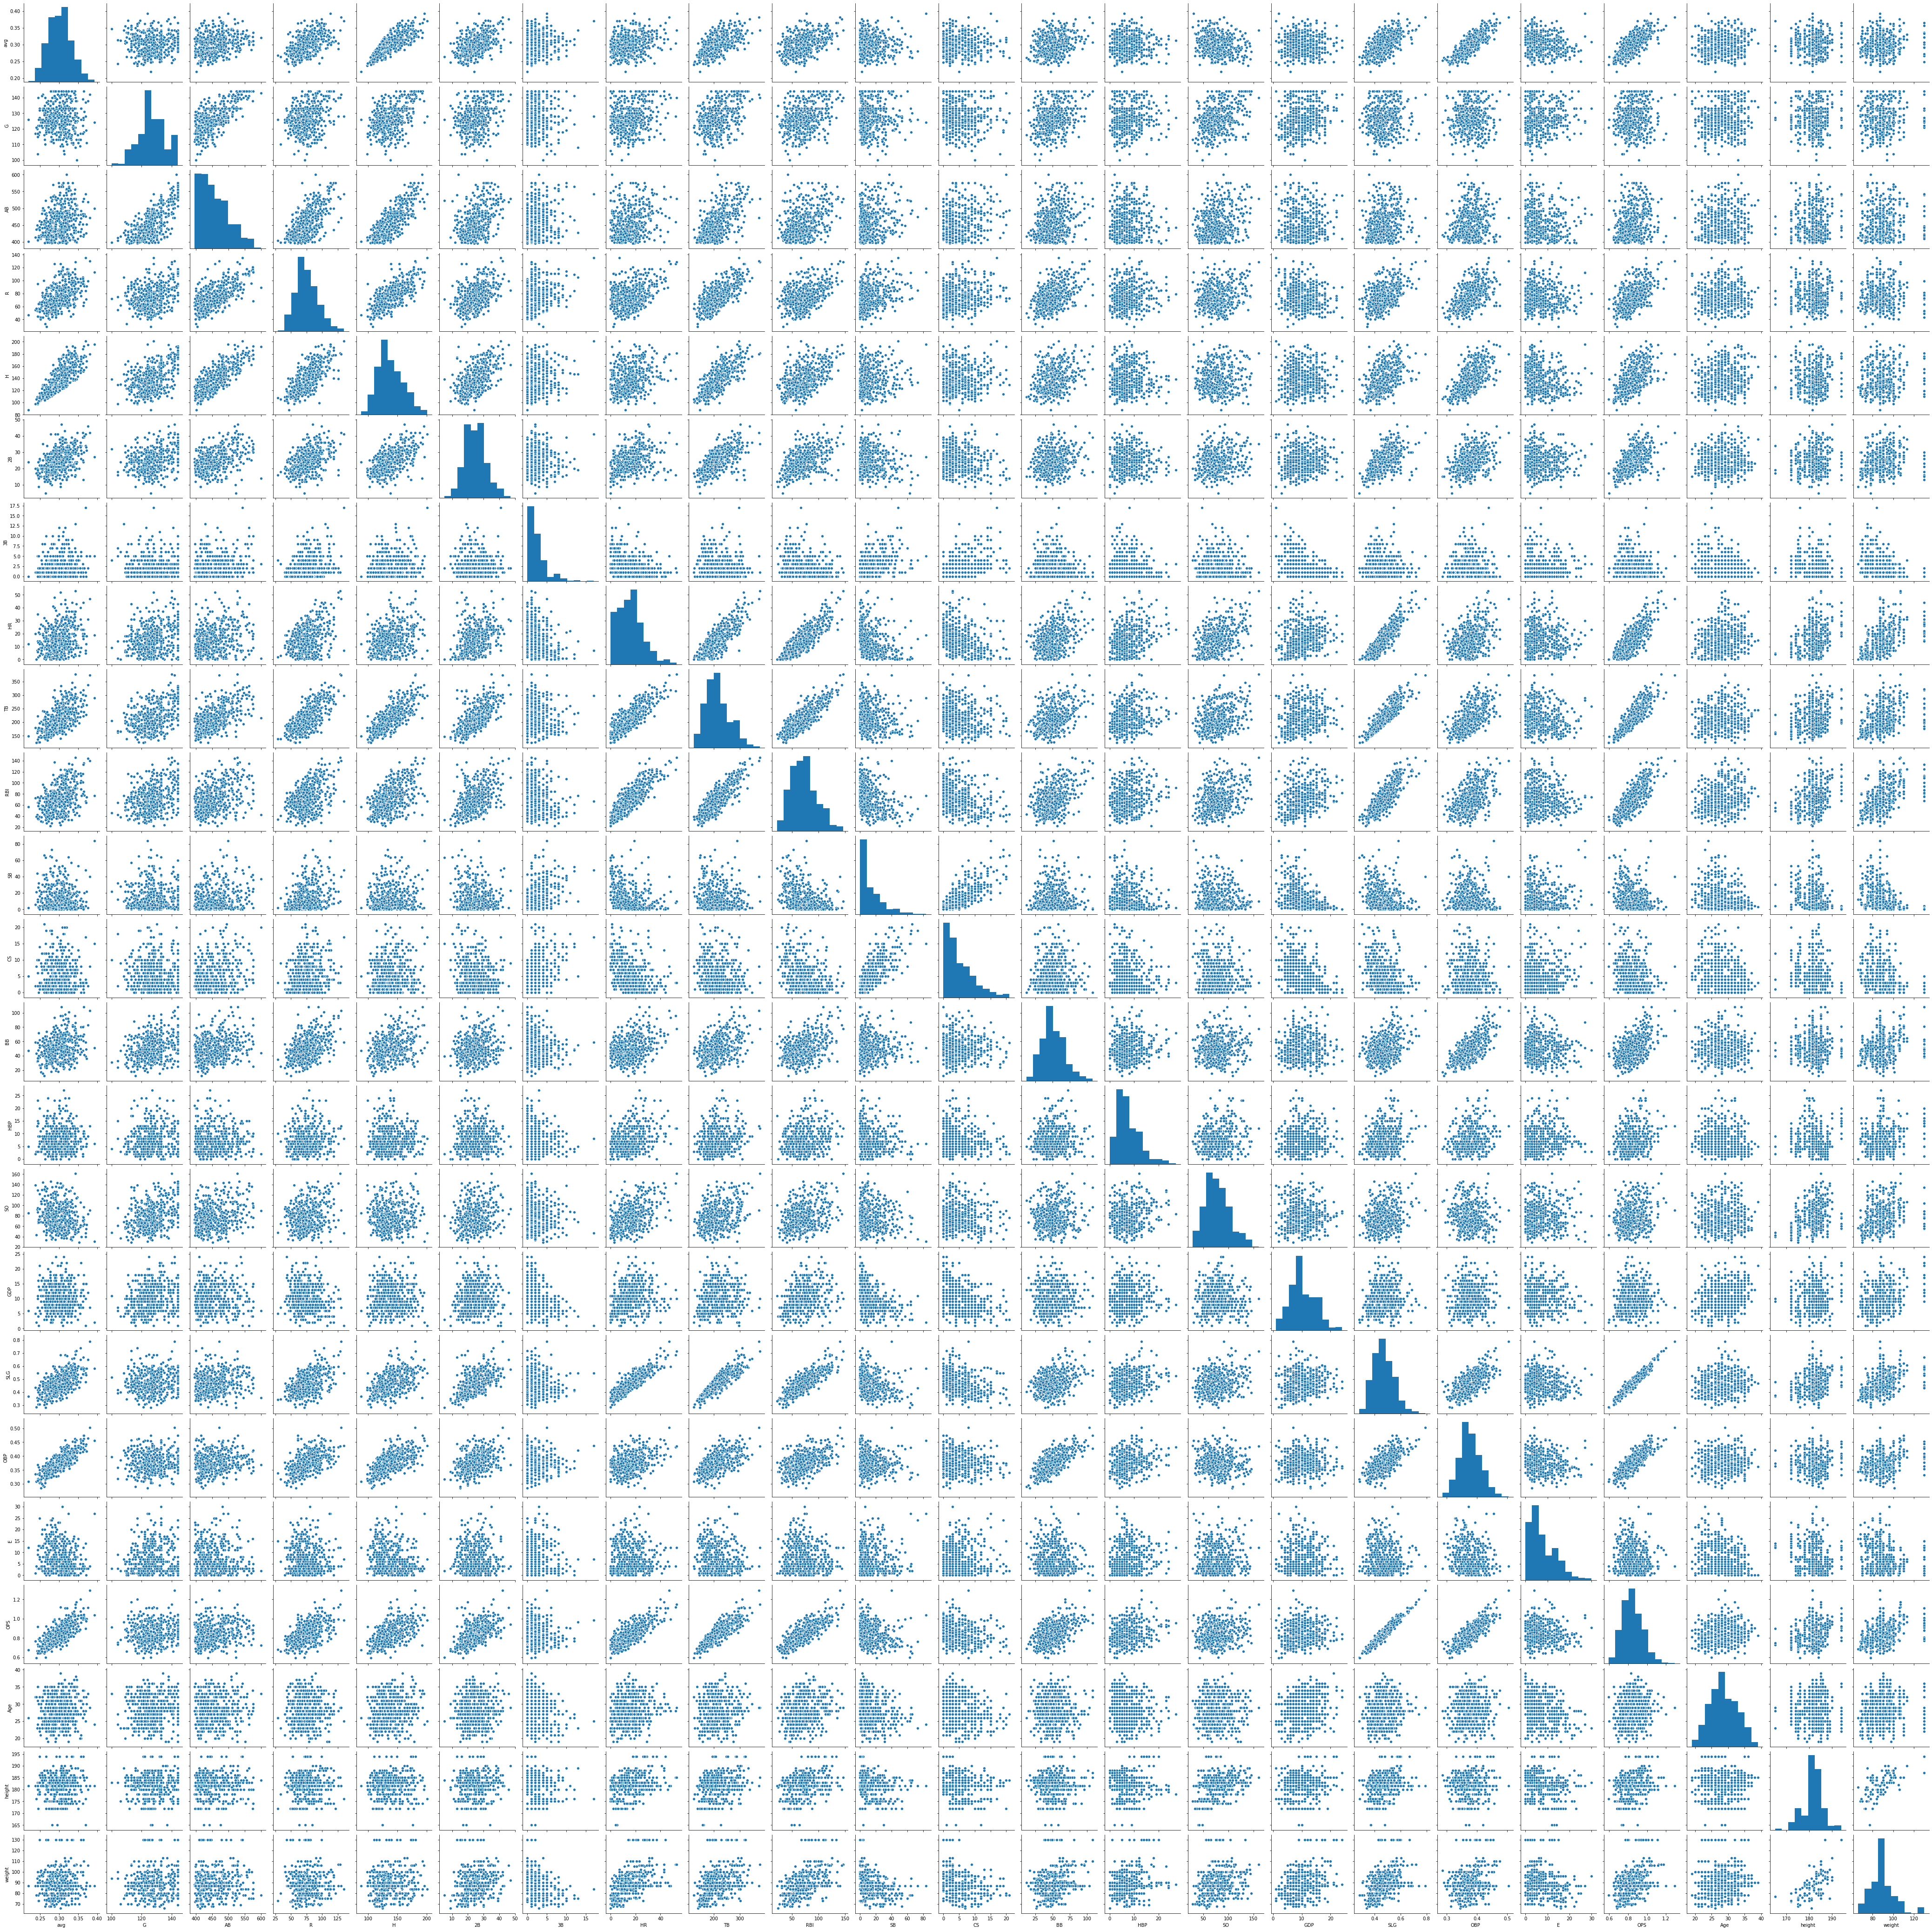

In [0]:
# plt.figure(figsize=(20, 20))
sns.pairplot(batter_conti)
plt.show()

### OPS를 구성하는 SLG와 OBP변수 이외에 상관계수가 높은 10개의 변수 분석 

In [0]:
correlation = batter_conti.corr()['OPS'].sort_values()
correlation

CS       -0.267981
SB       -0.241458
3B       -0.099228
E        -0.096574
G         0.096138
Age       0.118203
GDP       0.131474
SO        0.158876
AB        0.196898
height    0.244725
HBP       0.249505
weight    0.404335
BB        0.506995
2B        0.535947
R         0.556391
H         0.580368
avg       0.734834
RBI       0.793175
HR        0.794307
OBP       0.820374
TB        0.868420
SLG       0.968446
OPS       1.000000
Name: OPS, dtype: float64

In [0]:
correlation.tail(13)

HBP       0.249505
weight    0.404335
BB        0.506995
2B        0.535947
R         0.556391
H         0.580368
avg       0.734834
RBI       0.793175
HR        0.794307
OBP       0.820374
TB        0.868420
SLG       0.968446
OPS       1.000000
Name: OPS, dtype: float64

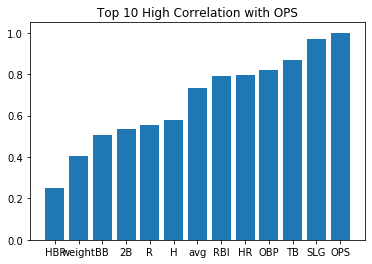

In [0]:
plt.bar(correlation.tail(13).index, correlation.tail(13))
plt.title('Top 10 High Correlation with OPS')
plt.show()

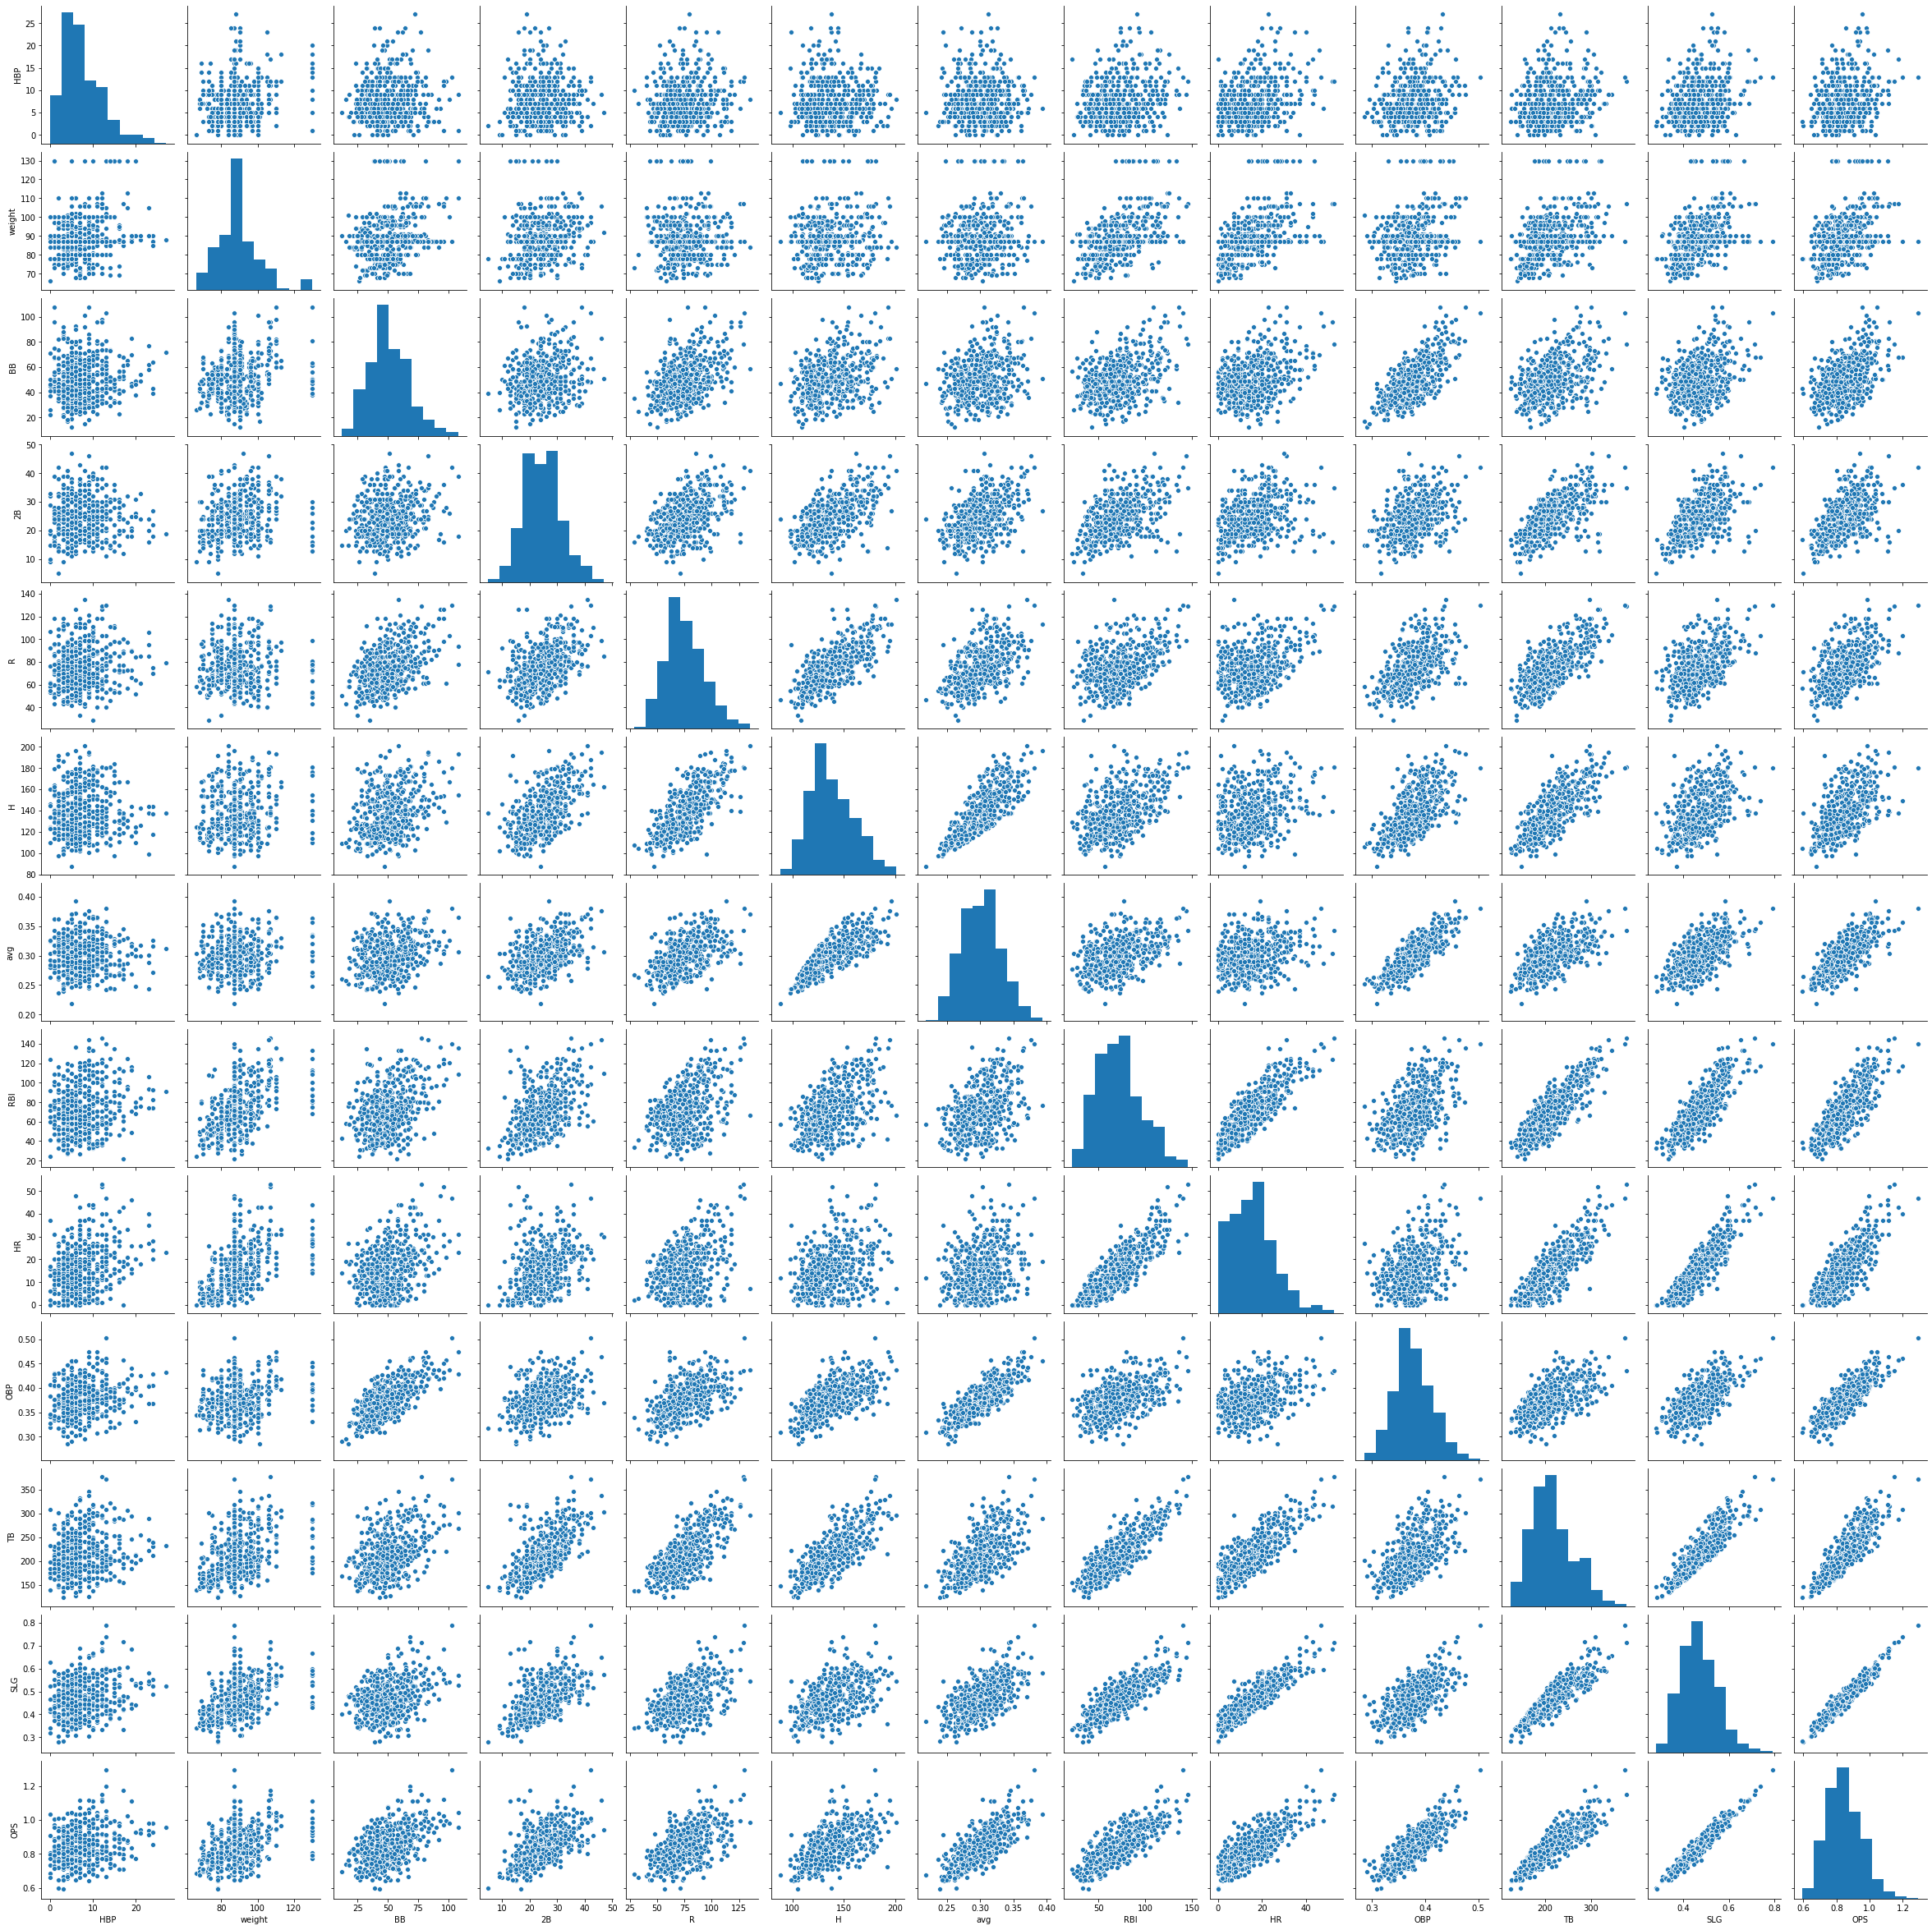

In [0]:
sns.pairplot(batter_conti[correlation.tail(13).index])
plt.show()

### VIF를 통한 다중공선성 확인

In [0]:
batter_top10 = batter_conti[correlation.tail(13)[:-1].index]

In [0]:
batter_top10 = batter_top10.drop(['SLG', 'OBP'], axis=1)

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(batter_top10.values, i) for i in range(batter_top10.shape[1])]
vif['features'] = batter_top10.columns
vif

VIF Factor features
0     4.003606      HBP
1    61.078551   weight
2    15.683639       BB
3    60.776715       2B
4    70.042581        R
5  1464.928515        H
6   188.931621      avg
7    55.466789      RBI
8   189.221033       HR
9  3144.789802       TB

## Baseline 모델 생성 (full model)

In [0]:
batter_conti.head()

avg    G   AB   R    H  2B  3B  HR   TB  RBI  ...  HBP  SO  GDP  \
24  0.281  133  462  58  130  29   1  18  215   86  ...    8  56   13   
25  0.290  126  435  64  126  20   2  21  213   53  ...   10  34   13   
26  0.278  129  439  60  122  20   0  24  214   71  ...   12  51   16   
44  0.251  126  410  40  103  20   0   9  150   53  ...   11  78    5   
45  0.271  125  413  48  112  20   0  14  174   68  ...    4  88   10   

         SLG       OBP   E       OPS  Age      height      weight  
24  0.465368  0.350294  11  0.815662   28  181.469128   86.848063  
25  0.489655  0.357588  13  0.847244   29  181.469128   86.848063  
26  0.487472  0.346392   5  0.833863   30  181.469128   86.848063  
44  0.366000  0.307000  12  0.673000   21  185.000000  100.000000  
45  0.421000  0.335000  11  0.756000   22  185.000000  100.000000  

[5 rows x 23 columns]

#### 타겟 분리(OPS)

In [0]:
target_OPS = batter_conti['OPS']
target_OPS.head()

24    0.815662
25    0.847244
26    0.833863
44    0.673000
45    0.756000
Name: OPS, dtype: float64

#### 상수항 추가 

In [0]:
batter_conti_ = batter_conti.drop(['OPS', 'SLG', 'OBP'], axis=1)
batter_conti_.head()

avg    G   AB   R    H  2B  3B  HR   TB  RBI  SB  CS  BB  HBP  SO  GDP  \
24  0.281  133  462  58  130  29   1  18  215   86   0   0  41    8  56   13   
25  0.290  126  435  64  126  20   2  21  213   53   1   1  36   10  34   13   
26  0.278  129  439  60  122  20   0  24  214   71   0   0  34   12  51   16   
44  0.251  126  410  40  103  20   0   9  150   53   4   1  23   11  78    5   
45  0.271  125  413  48  112  20   0  14  174   68   1   4  37    4  88   10   

     E  Age      height      weight  
24  11   28  181.469128   86.848063  
25  13   29  181.469128   86.848063  
26   5   30  181.469128   86.848063  
44  12   21  185.000000  100.000000  
45  11   22  185.000000  100.000000

In [0]:
batter_conti_1 = sm.add_constant(batter_conti_, has_constant='add')

In [0]:
full_model = sm.OLS(target_OPS, batter_conti_1)
fitted_full_model = full_model.fit()

In [0]:
print(fitted_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    OPS   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     5482.
Date:                Sun, 03 May 2020   Prob (F-statistic):               0.00
Time:                        15:17:08   Log-Likelihood:                 1684.3
No. Observations:                 475   AIC:                            -3329.
Df Residuals:                     455   BIC:                            -3245.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0640      0.044      1.452      0.1

#### 잔차비교 

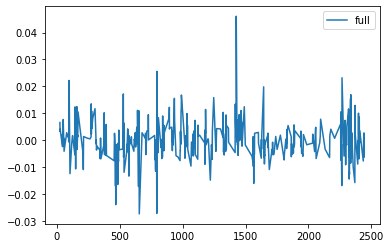

In [0]:
fitted_full_model.resid.plot(label='full')
plt.legend()
plt.show()

#### vif를 통한 다중공선성 확인 

In [0]:
vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(batter_conti_.values, i) for i in range(batter_conti_.shape[1])]
vif['features'] = batter_conti_.columns
vif

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF_Factor features
0   2651.875265      avg
1    583.110661        G
2   3286.855998       AB
3     87.503583        R
4           inf        H
5           inf       2B
6           inf       3B
7           inf       HR
8           inf       TB
9     61.629255      RBI
10     6.024532       SB
11     6.675609       CS
12    17.465905       BB
13     4.356628      HBP
14    21.104994       SO
15    10.019561      GDP
16     3.326348        E
17    65.637897      Age
18  3169.910946   height
19   170.156494   weight

#### qq plot 정규분포확인 

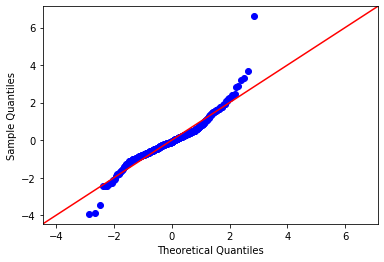

In [0]:
fig = sm.qqplot(fitted_full_model.resid, fit=True, line='45')

#### residual 패턴 확인 

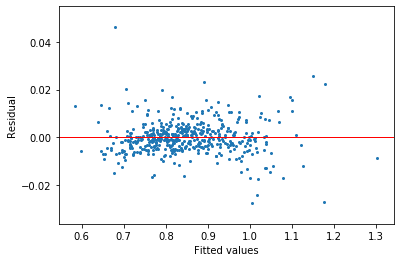

In [0]:
plt.scatter(fitted_full_model.predict(batter_conti_1), fitted_full_model.resid, s=4)
plt.axhline(y=0, color='r', linewidth=1)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.show()

## HR / RBI / 2B / BB / weigth / HBP 변수로 각각 단순 선형 회귀분석 

### 변수별로 데이터 분해 

In [0]:
HR = batter_conti['HR']
RBI = batter_conti['RBI']
_2B = batter_conti['2B']
BB = batter_conti['BB']
weight = batter_conti['weight']
HBP = batter_conti['HBP']
target_OPS.head()

24    0.815662
25    0.847244
26    0.833863
44    0.673000
45    0.756000
Name: OPS, dtype: float64

#### target변수 제외한 모든항에 상수항 추가 

In [0]:
HR1 = sm.add_constant(HR, has_constant='add')
RBI1 = sm.add_constant(RBI, has_constant='add')
_2B1 = sm.add_constant(_2B, has_constant='add')
BB1 = sm.add_constant(BB, has_constant='add')
weight1 = sm.add_constant(weight, has_constant='add')
HBP1 = sm.add_constant(HBP, has_constant='add')

 #### sm.OLS 적합시키기

In [0]:
model_HR = sm.OLS(target_OPS, HR1)
fitted_model_HR = model_HR.fit()

model_RBI = sm.OLS(target_OPS, RBI1)
fitted_model_RBI = model_RBI.fit()

model_2B = sm.OLS(target_OPS, _2B1)
fitted_model_2B = model_2B.fit()

model_BB = sm.OLS(target_OPS, BB1)
fitted_model_BB = model_BB.fit()

model_weight = sm.OLS(target_OPS, weight1)
fitted_model_weight = model_weight.fit()

model_HBP = sm.OLS(target_OPS, HBP1)
fitted_model_HBP = model_HBP.fit()

#### 결과 출력

In [0]:
print(fitted_model_HR.summary())
print(fitted_model_RBI.summary())
print(fitted_model_2B.summary())
print(fitted_model_BB.summary())
print(fitted_model_weight.summary())
print(fitted_model_HBP.summary())

                            OLS Regression Results                            
Dep. Variable:                    OPS   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     808.6
Date:                Sun, 03 May 2020   Prob (F-statistic):          1.94e-104
Time:                        15:17:08   Log-Likelihood:                 629.58
No. Observations:                 475   AIC:                            -1255.
Df Residuals:                     473   BIC:                            -1247.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7132      0.006    128.430      0.0

#### yhat 구하기 

In [0]:
pred_HR = fitted_model_HR.predict(HR1)
pred_RBI = fitted_model_RBI.predict(RBI1)
pred_2B = fitted_model_2B.predict(_2B1)
pred_BB = fitted_model_BB.predict(BB1)
pred_weight = fitted_model_weight.predict(weight1)
pred_HBP = fitted_model_HBP.predict(HBP1)

#### 회귀계수 출력

In [0]:
print('HR')
print(fitted_model_HR.params)
print('-'*30)
print('RBI')
print(fitted_model_RBI.params)
print('-'*30)
print('2B')
print(fitted_model_2B.params)
print('-'*30)
print('BB')
print(fitted_model_BB.params)
print('-'*30)
print('weight')
print(fitted_model_weight.params)
print('-'*30)
print('HBP')
print(fitted_model_HBP.params)
print('-'*30)

HR
const    0.713174
HR       0.008332
dtype: float64
------------------------------
RBI
const    0.593403
RBI      0.003498
dtype: float64
------------------------------
2B
const    0.642703
2B       0.008266
dtype: float64
------------------------------
BB
const    0.681086
BB       0.003263
dtype: float64
------------------------------
weight
const     0.51934
weight    0.00367
dtype: float64
------------------------------
HBP
const    0.804580
HBP      0.005587
dtype: float64
------------------------------


#### 시각화 

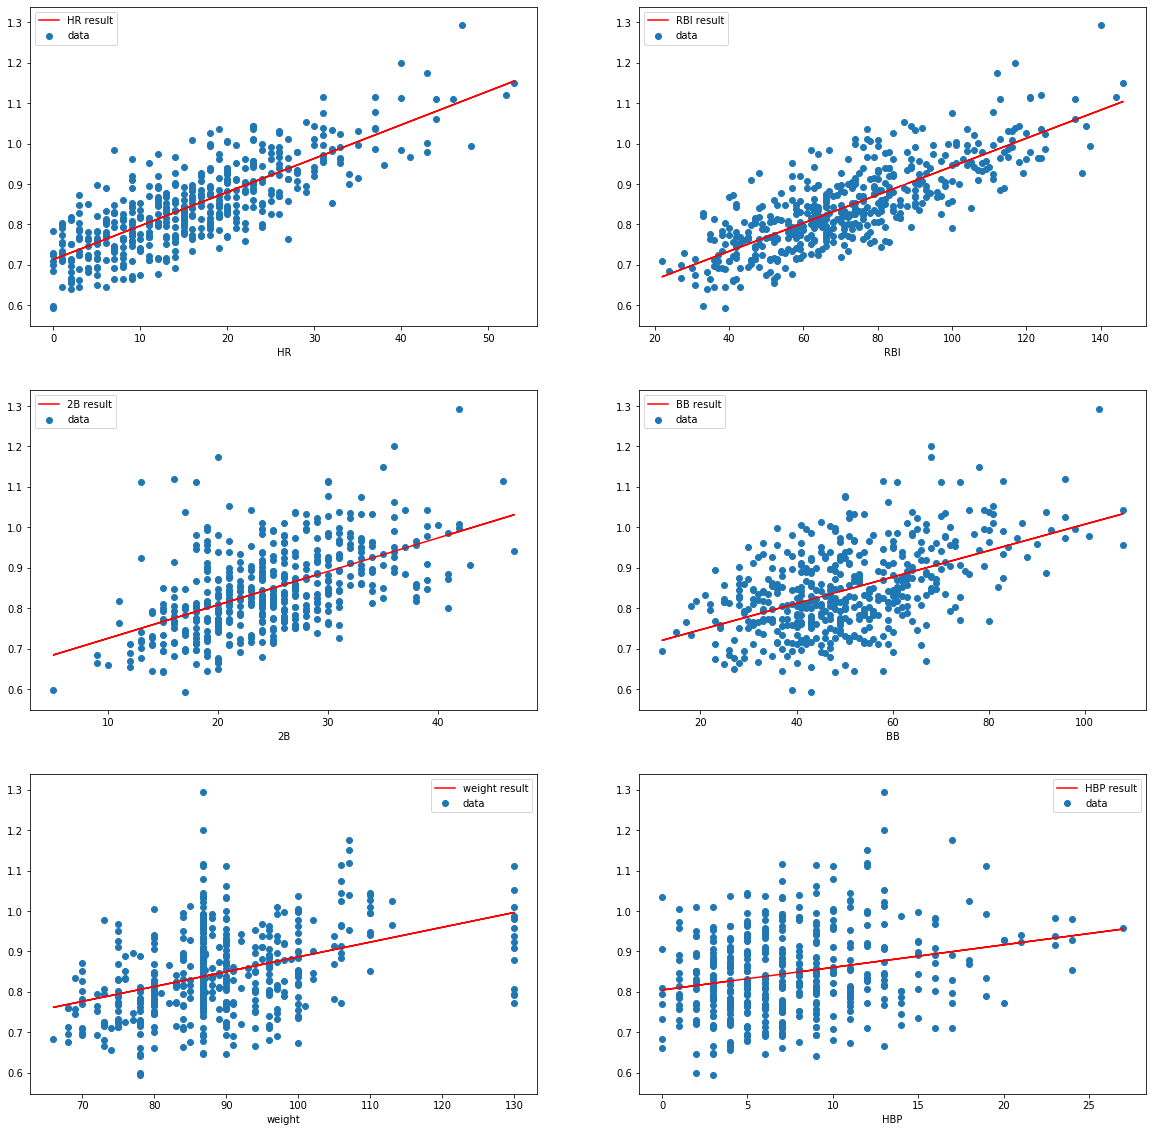

In [0]:
plt.figure(figsize=(20, 20))
plt.yticks(fontname='Arial')

plt.subplot(321)
plt.scatter(HR, target_OPS, label='data')
plt.plot(HR, pred_HR, 'r', label='HR result')
plt.xlabel('HR')
plt.legend()

plt.subplot(322)
plt.scatter(RBI, target_OPS, label='data')
plt.plot(RBI, pred_RBI, 'r', label='RBI result')
plt.xlabel('RBI')
plt.legend()

plt.subplot(323)
plt.scatter(_2B, target_OPS, label='data')
plt.plot(_2B, pred_2B, 'r', label='2B result')
plt.xlabel('2B')
plt.legend()

plt.subplot(324)
plt.scatter(BB, target_OPS, label='data')
plt.plot(BB, pred_BB, 'r', label='BB result')
plt.xlabel('BB')
plt.legend()

plt.subplot(325)
plt.scatter(weight, target_OPS, label='data')
plt.plot(weight, pred_weight, 'r', label='weight result')
plt.xlabel('weight')
plt.legend()

plt.subplot(326)
plt.scatter(HBP, target_OPS, label='data')
plt.plot(HBP, pred_HBP, 'r', label='HBP result')
plt.xlabel('HBP')
plt.legend()

plt.show()

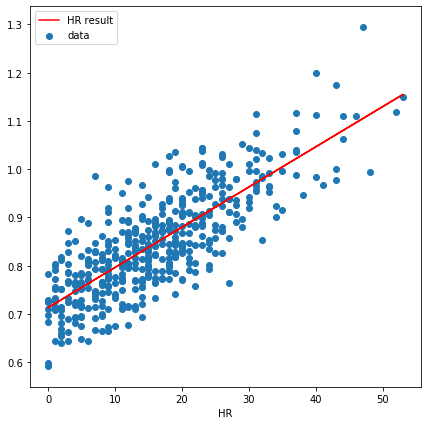

In [0]:
# HR
plt.figure(figsize=(7, 7))
plt.scatter(HR, target_OPS, label='data')
plt.plot(HR, pred_HR, 'r', label='HR result')
plt.xlabel('HR')
plt.legend()
plt.show()

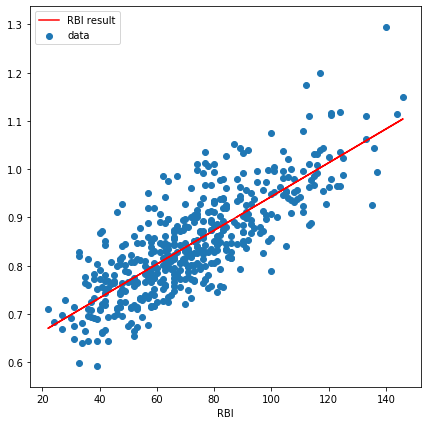

In [0]:
# RBI
plt.figure(figsize=(7, 7))
plt.scatter(RBI, target_OPS, label='data')
plt.plot(RBI, pred_RBI, 'r', label='RBI result')
plt.xlabel('RBI')
plt.legend()
plt.show()

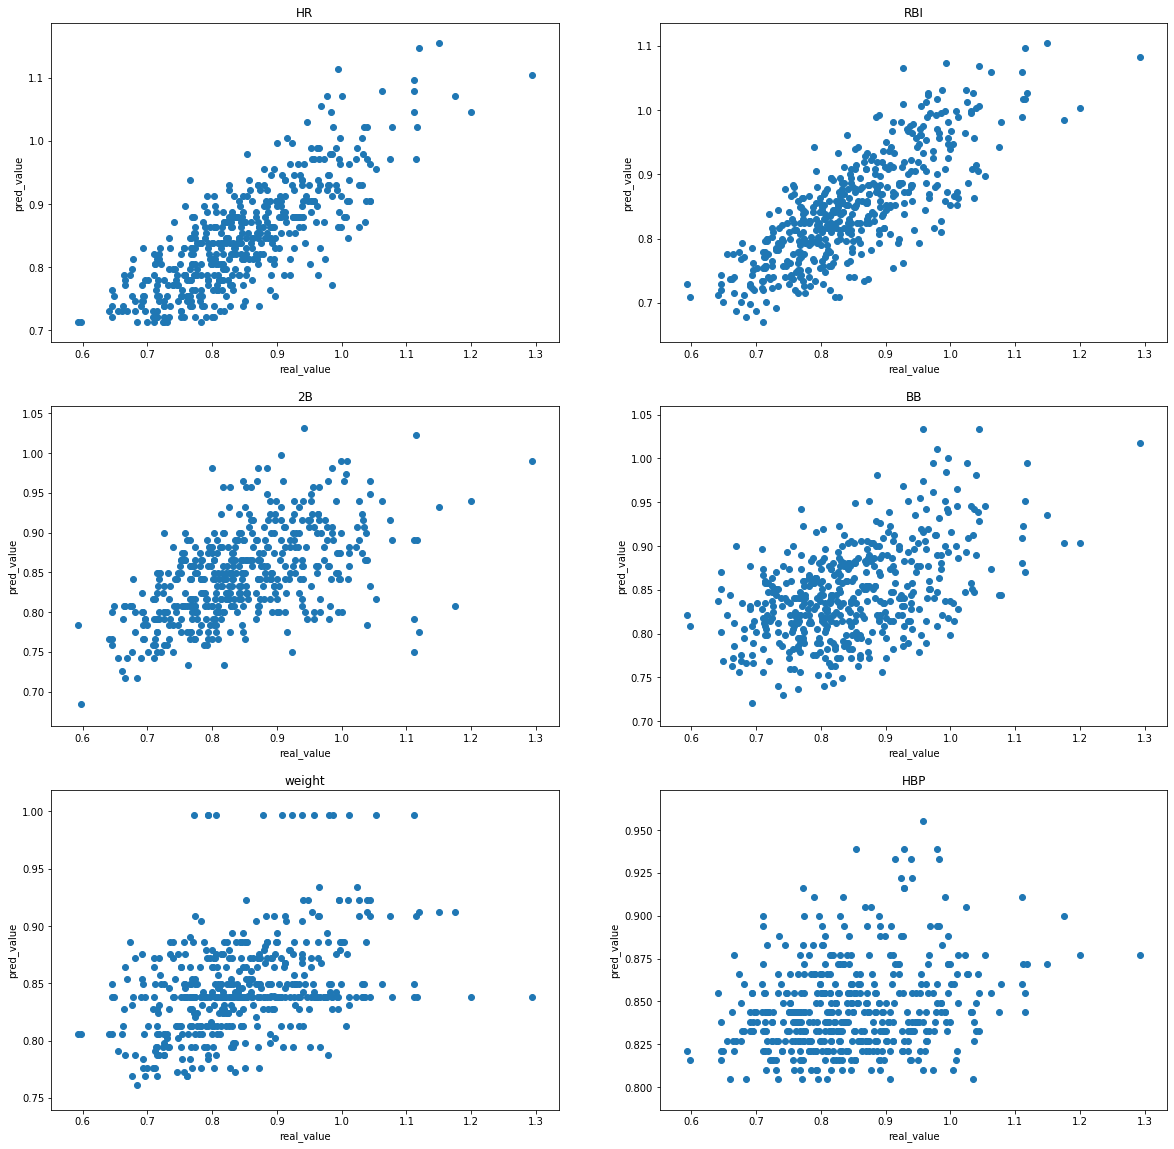

In [0]:
plt.figure(figsize=(20, 20))

plt.subplot(321)
plt.scatter(target_OPS, pred_HR)
plt.title('HR')
plt.xlabel('real_value')
plt.ylabel('pred_value')

plt.subplot(322)
plt.scatter(target_OPS, pred_RBI)
plt.title('RBI')
plt.xlabel('real_value')
plt.ylabel('pred_value')

plt.subplot(323)
plt.scatter(target_OPS, pred_2B)
plt.title('2B')
plt.xlabel('real_value')
plt.ylabel('pred_value')

plt.subplot(324)
plt.scatter(target_OPS, pred_BB)
plt.title('BB')
plt.xlabel('real_value')
plt.ylabel('pred_value')

plt.subplot(325)
plt.scatter(target_OPS, pred_weight)
plt.title('weight')
plt.xlabel('real_value')
plt.ylabel('pred_value')

plt.subplot(326)
plt.scatter(target_OPS, pred_HBP)
plt.title('HBP')
plt.xlabel('real_value')
plt.ylabel('pred_value')

plt.show()

#### qq plot 정규분포 확인 

Text(0.5, 1.0, 'HBP')

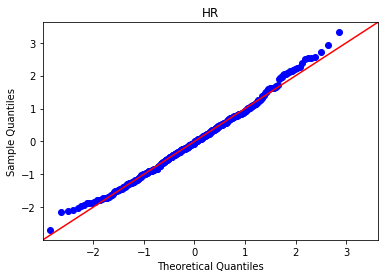

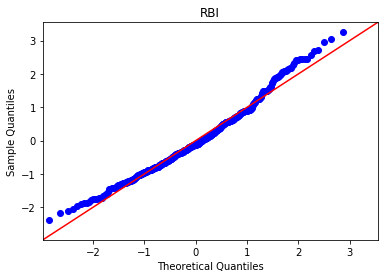

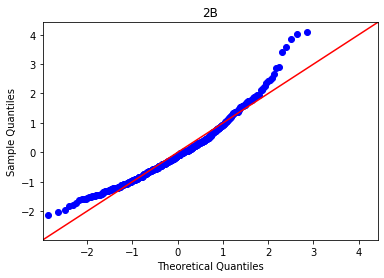

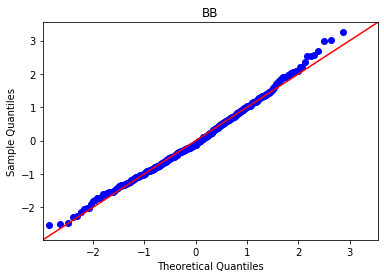

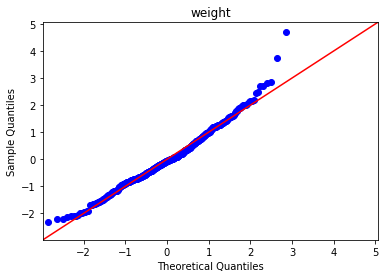

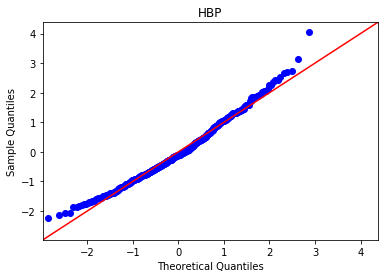

In [0]:
sm.qqplot(fitted_model_HR.resid, fit=True, line='45')
plt.title('HR')

sm.qqplot(fitted_model_RBI.resid, fit=True, line='45')
plt.title('RBI')

sm.qqplot(fitted_model_2B.resid, fit=True, line='45')
plt.title('2B')

sm.qqplot(fitted_model_BB.resid, fit=True, line='45')
plt.title('BB')

sm.qqplot(fitted_model_weight.resid, fit=True, line='45')
plt.title('weight')

sm.qqplot(fitted_model_HBP.resid, fit=True, line='45')
plt.title('HBP')

#### residual 패턴확인 

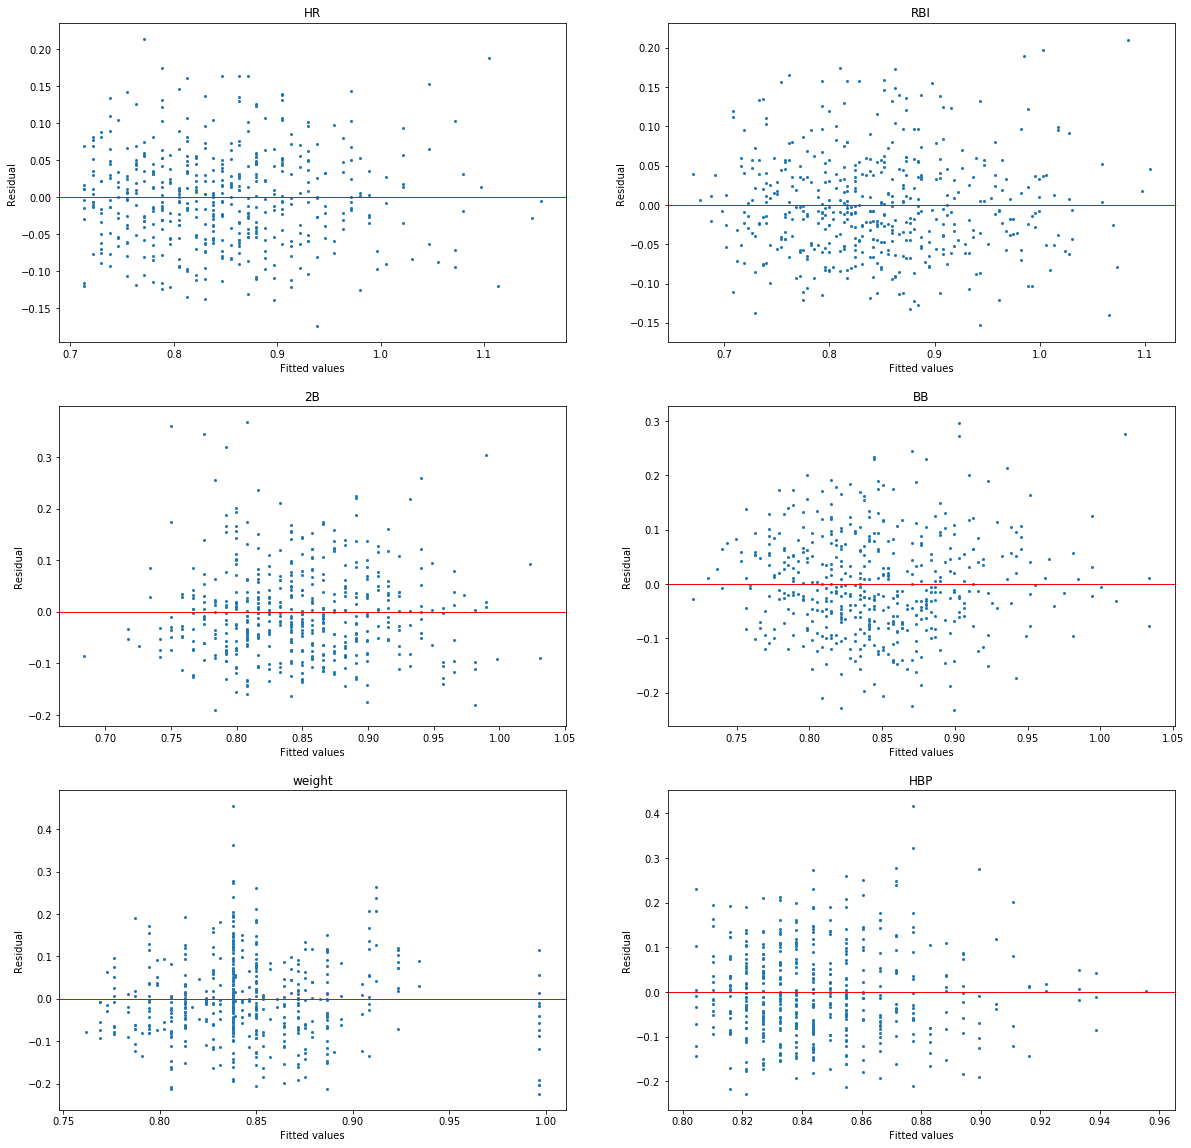

In [0]:
plt.figure(figsize=(20, 20))

plt.subplot(321)
plt.scatter(fitted_model_HR.predict(HR1), fitted_model_HR.resid, s=4)
plt.axhline(y=0, color='r', linewidth=1)
plt.title('HR')
plt.xlabel('Fitted values')
plt.ylabel('Residual')

plt.subplot(322)
plt.scatter(fitted_model_RBI.predict(RBI1), fitted_model_RBI.resid, s=4)
plt.axhline(y=0, color='r', linewidth=1)
plt.title('RBI')
plt.xlabel('Fitted values')
plt.ylabel('Residual')

plt.subplot(323)
plt.scatter(fitted_model_2B.predict(_2B1), fitted_model_2B.resid, s=4)
plt.axhline(y=0, color='r', linewidth=1)
plt.title('2B')
plt.xlabel('Fitted values')
plt.ylabel('Residual')

plt.subplot(324)
plt.scatter(fitted_model_BB.predict(BB1), fitted_model_BB.resid, s=4)
plt.axhline(y=0, color='r', linewidth=1)
plt.title('BB')
plt.xlabel('Fitted values')
plt.ylabel('Residual')

plt.subplot(325)
plt.scatter(fitted_model_weight.predict(weight1), fitted_model_weight.resid, s=4)
plt.axhline(y=0, color='r', linewidth=1)
plt.title('weight')
plt.xlabel('Fitted values')
plt.ylabel('Residual')

plt.subplot(326)
plt.scatter(fitted_model_HBP.predict(HBP1), fitted_model_HBP.resid, s=4)
plt.axhline(y=0, color='r', linewidth=1)
plt.title('HBP')
plt.xlabel('Fitted values')
plt.ylabel('Residual')

plt.show()

Text(0, 0.5, 'Residual')

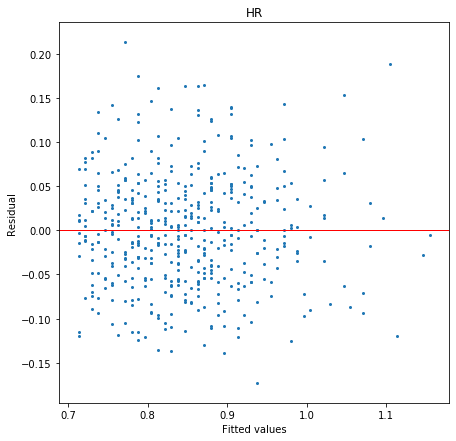

In [0]:
# HR
plt.figure(figsize=(7, 7))
plt.scatter(fitted_model_HR.predict(HR1), fitted_model_HR.resid, s=4)
plt.axhline(y=0, color='r', linewidth=1)
plt.title('HR')
plt.xlabel('Fitted values')
plt.ylabel('Residual')

Text(0, 0.5, 'Residual')

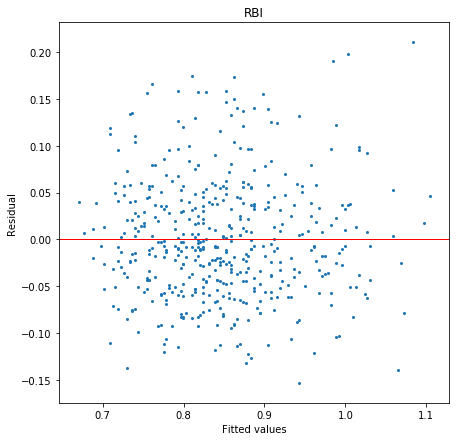

In [0]:
# RBI
plt.figure(figsize=(7, 7))
plt.scatter(fitted_model_RBI.predict(RBI1), fitted_model_RBI.resid, s=4)
plt.axhline(y=0, color='r', linewidth=1)
plt.title('RBI')
plt.xlabel('Fitted values')
plt.ylabel('Residual')

#### residual 시각화 

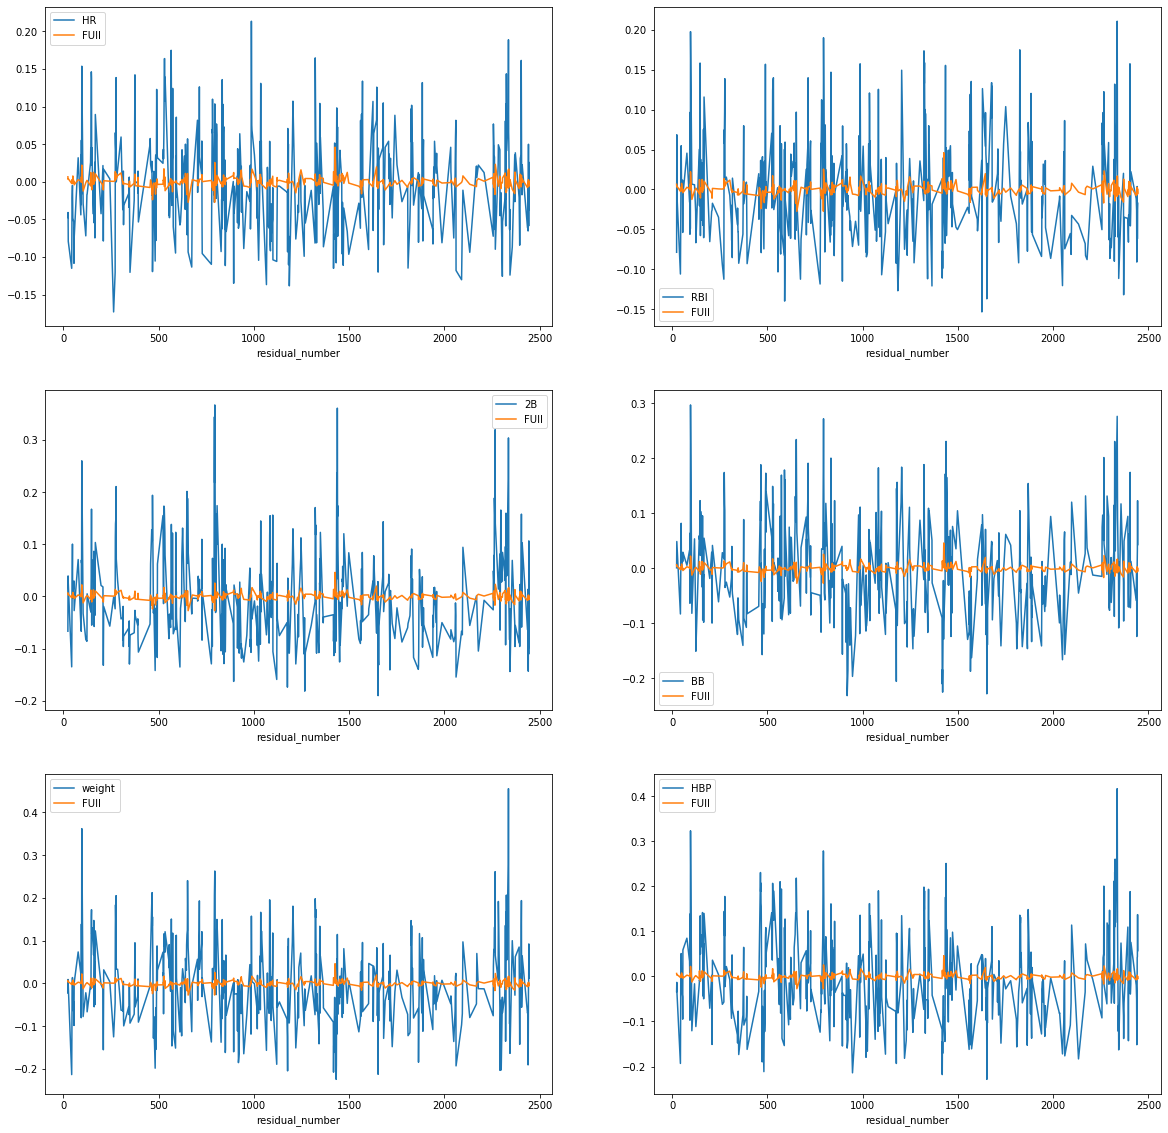

In [0]:
plt.figure(figsize=(20, 20))

plt.subplot(321)
fitted_model_HR.resid.plot(label='HR')
fitted_full_model.resid.plot(label='FUll')
plt.xlabel('residual_number')
plt.legend()

plt.subplot(322)
fitted_model_RBI.resid.plot(label='RBI')
fitted_full_model.resid.plot(label='FUll')
plt.xlabel('residual_number')
plt.legend()

plt.subplot(323)
fitted_model_2B.resid.plot(label='2B')
fitted_full_model.resid.plot(label='FUll')
plt.xlabel('residual_number')
plt.legend()

plt.subplot(324)
fitted_model_BB.resid.plot(label='BB')
fitted_full_model.resid.plot(label='FUll')
plt.xlabel('residual_number')
plt.legend()

plt.subplot(325)
fitted_model_weight.resid.plot(label='weight')
fitted_full_model.resid.plot(label='FUll')
plt.xlabel('residual_number')
plt.legend()

plt.subplot(326)
fitted_model_HBP.resid.plot(label='HBP')
fitted_full_model.resid.plot(label='FUll')
plt.xlabel('residual_number')
plt.legend()

plt.show()

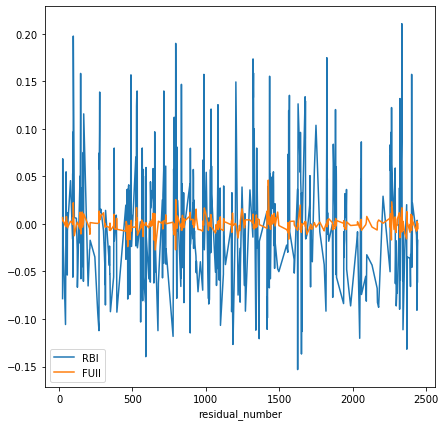

In [0]:
plt.figure(figsize=(7, 7))
fitted_model_RBI.resid.plot(label='RBI')
fitted_full_model.resid.plot(label='FUll')
plt.xlabel('residual_number')
plt.legend()
plt.show()